In [1]:
import pandas as pd

df = pd.read_csv("D:\\fraud-detection\\data\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()
df.describe()
df['Class'].value_counts()


<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

Class
0    284315
1       492
Name: count, dtype: int64

In [3]:
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

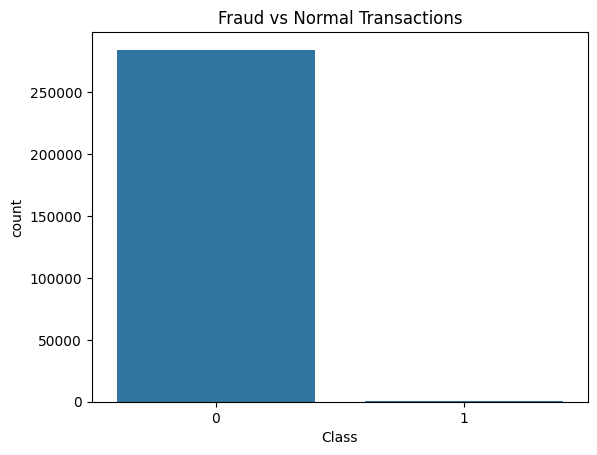

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.savefig("../plots/class_balance.png")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.63      0.70        98

    accuracy                           1.00     56962
   macro avg       0.89      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9517586895478507


d:\fraud-detection\venvv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)

rf_prob = rf.predict_proba(X_test)[:,1]
print("RF ROC:", roc_auc_score(y_test, rf_prob))


RF ROC: 0.9685336764840997


In [9]:

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    eval_metric="logloss"
)

xgb.fit(X_res, y_res)
xgb_prob = xgb.predict_proba(X_test)[:,1]
print("XGB ROC:", roc_auc_score(y_test, xgb_prob))


XGB ROC: 0.9849129824974446


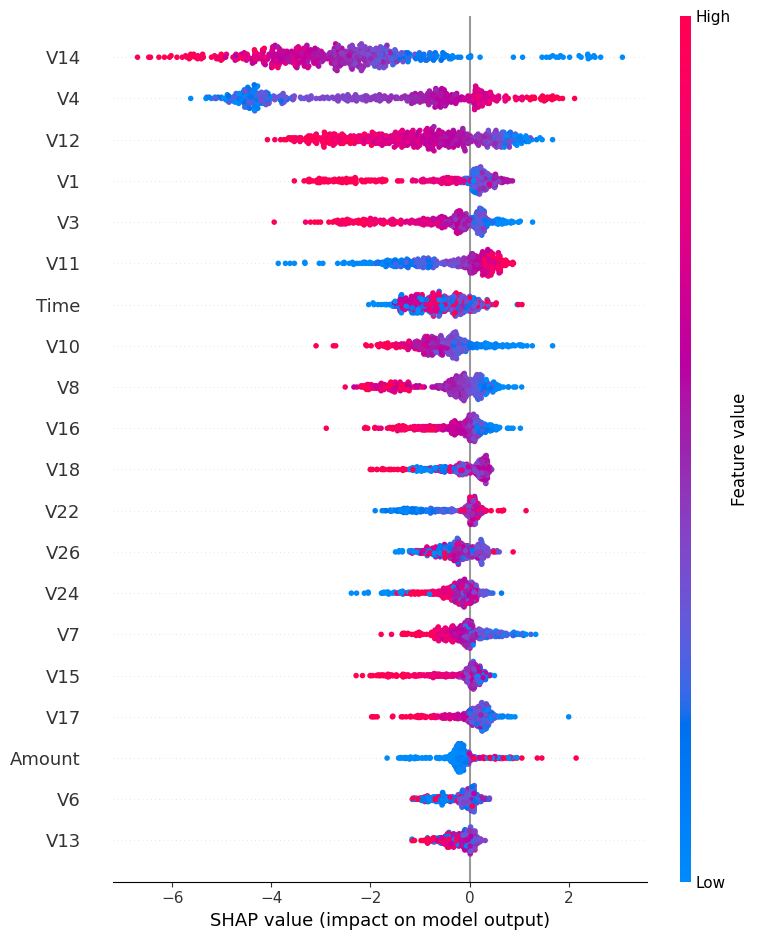

In [10]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test[:500])

shap.summary_plot(shap_values, X_test[:500])

In [11]:
import joblib

joblib.dump(xgb, "../fraud_model.pkl")




['../fraud_model.pkl']

In [13]:
fraud_index = y_test[y_test == 1].index[0]
X_test.loc[fraud_index].values.tolist()

[57007.0,
 -1.27124419171437,
 2.46267526851135,
 -2.85139500331783,
 2.3244800653478,
 -1.37224488981369,
 -0.948195686538643,
 -3.06523436172054,
 1.16692694787211,
 -2.26877058844813,
 -4.88114292689057,
 2.25514748870463,
 -4.68638689759229,
 0.652374668512965,
 -6.17428834800643,
 0.594379608016446,
 -4.84969238709652,
 -6.53652073527011,
 -3.11909388163881,
 1.71549441975915,
 0.560478075726644,
 0.652941051330455,
 0.0819309763507574,
 -0.221347831198339,
 -0.523582159233306,
 0.224228161862968,
 0.756334522703558,
 0.632800477330469,
 0.250187092757197,
 0.01]